<a href="https://colab.research.google.com/github/YonggunJung/Programmers/blob/main/%EC%95%88%EC%A0%84%EC%A7%80%EB%8C%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

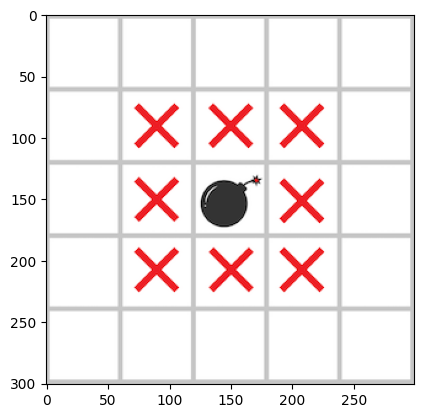

In [5]:
# 문제 설명
# 다음 그림과 같이 지뢰가 있는 지역과
# 지뢰에 인접한 위, 아래, 좌, 우 대각선 칸을 모두 위험지역으로 분류합니다.
# [그림]
# 지뢰는 2차원 배열 board에 1로 표시되어 있고 board에는 지뢰가 매설 된 지역 1과,
# 지뢰가 없는 지역 0만 존재합니다.
# 지뢰가 매설된 지역의 지도 board가 매개변수로 주어질 때,
# 안전한 지역의 칸 수를 return하도록 solution 함수를 완성해주세요.

# 제한사항
# board는 n * n 배열입니다.
# 1 ≤ n ≤ 100
# 지뢰는 1로 표시되어 있습니다.
# board에는 지뢰가 있는 지역 1과 지뢰가 없는 지역 0만 존재합니다.

# 입출력 예
# board	                                                                                                                                  result
# [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 0]]	                                                    16
# [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 0, 0]]	                                                    13
# [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]	                 0

# 입출력 예 설명
# 입출력 예 #1
# (3, 2)에 지뢰가 있으므로 지뢰가 있는 지역과 지뢰와 인접한 위, 아래, 좌, 우, 대각선 총 8칸은 위험지역입니다.
# 따라서 16을 return합니다.

# 입출력 예 #2
# (3, 2), (3, 3)에 지뢰가 있으므로 지뢰가 있는 지역과 지뢰와 인접한 위, 아래, 좌, 우, 대각선은 위험지역입니다.
# 따라서 위험지역을 제외한 칸 수 13을 return합니다.

# 입출력 예 #3
# 모든 지역에 지뢰가 있으므로 안전지역은 없습니다. 따라서 0을 return합니다.

import matplotlib.pyplot as plt
import cv2

img_bgr = cv2.imread('/content/d.png')

img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [7]:
# 너무 어려웠음 감도 잘 못잡음
def solution(board):
    coordinate = set()
    n = len(board)
    for i, row in enumerate(board):
        for j, col in enumerate(row):
            if col == 1:
                for x in (-1, 0, 1):
                    for y in (-1, 0, 1):
                        if -1 < i + x < n and -1 < j + y < n:
                            coordinate.add((i + x, j + y))
    return n * n - len(coordinate)

In [8]:
board = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 0]]
solution(board)

16

In [9]:
board = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 0, 0]]
solution(board)

13

In [10]:
board = [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
solution(board)

0

In [11]:
# 다른 사람 풀이

In [12]:
# 시작은 똑같이 하고 조건에서 달라짐
def solution(board):
    n = len(board)
    danger = set()
    for i, row in enumerate(board):
        for j, x in enumerate(row):
            if not x:
                continue
            danger.update((i+di, j+dj) for di in [-1,0,1] for dj in [-1, 0, 1])
    return n*n - sum(0 <= i < n and 0 <= j < n for i, j in danger)

In [ ]:
# 정확히 딱 깔끔한 코드는 안보임. 이정도가 최선인듯
def solution(board):
    answer = 0

    for col in range(len(board)):
        for row in range(len(board[col])):
            if board[row][col] == 1:
                for j in range(max(col-1,0),min(col+2,len(board))):
                    for i in range(max(row-1,0),min(row+2,len(board))):
                        if board[i][j] == 1:
                            continue
                        board[i][j] = -1
    for i in board:
        answer += i.count(0)

    return answer